In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import eternabench as eb

Populating the interactive namespace from numpy and matplotlib


In this notebook:

- [x] Figure 1 E/F: Cloud Labs Chem Mapping ranking

- [x] Figure 3: EternaFold Cloud labs test set ranking (need to update with new Efold src)


In [2]:
#df = eb.load_CM_scores()
df = pd.read_csv('/Users/hwayment/das/github/EternaBench/scoring_data/EB_-efold_pearson_zscores_by_Dataset.csv')

In [12]:
for x in df.Dataset.unique():
    print(x)

Round 00
Round 01
Round 02
Round 03
Round 04
Round 05
Round 06
Round 07
Round 08
Round 09
Round 10
Round 11
Round 12
Round 13
Round 14
Round 15
Round 16
Round 17
Round 18
Round 19
Round 20
Round 21
Round 22
Round 23


In [11]:
df = df.loc[df.Dataset!='RYOS_I'] # Remove RYOS I
df = df.loc[df.package!='nupack_99_60C'] # not fair


zscores,ranking = eb.stats.calculate_Z_scores(df, metric='pearson', dataset_field='Dataset')

KeyError: 'bs_ind'

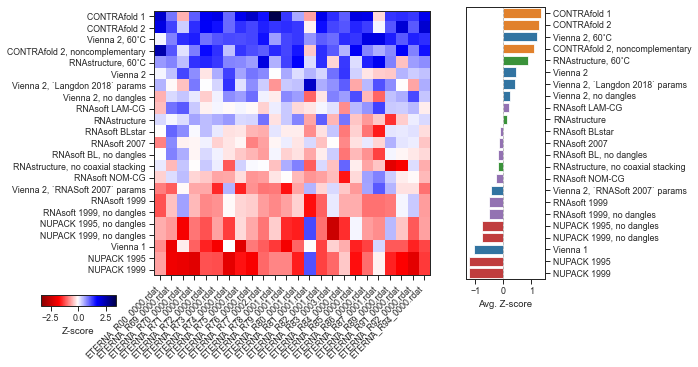

In [19]:
eb.plot.ranked_heatmap(zscores, ranking, figsize=(7,5), width_ratios=[3.5,1])
savefig('FIGURES/1/Figure_1EF.pdf',bbox_inches='tight')

Loading scores DONE_17Apr2021ScoreDF.json.zip
Fields: bs_ind, package, spearman, filename


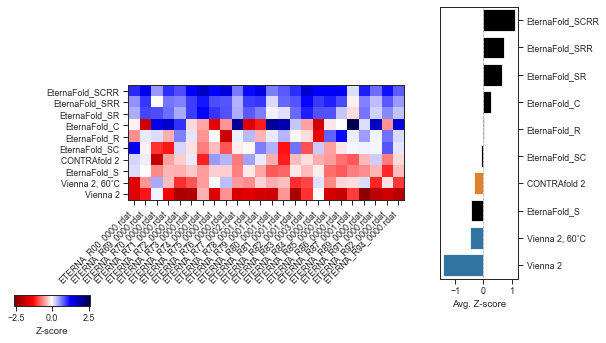

In [23]:
df = eb.load_CM_scores()
df = df.loc[df.filename.str.contains('ETERNA')] # Remove RYOS I

comparisons=['vienna_2', 'vienna_2_60C', 'contrafold_2']

df = pd.concat([df.loc[df.package.isin(comparisons)] , df.loc[df.package.str.contains('eternafold')]])
zscores,ranking = eb.stats.calculate_Z_scores(df, metric='spearman', dataset_field='filename', include_efold=True)

eb.plot.ranked_heatmap(zscores, ranking, figsize=(7,5), width_ratios=[3.5,1])
savefig('FIGURES/3/Figure_3B.pdf',bbox_inches='tight')

